# Practical Activity 2 (**PRA2**)

## Evaluable Practical Exercise

<u>General considerations</u>:

- The proposed solution cannot use methods, functions or parameters declared **_deprecated_** in future versions.
- This activity must be carried out on a **strictly individual** basis. Any indication of copying will be penalized with a failure for all parties involved and the possible negative evaluation of the subject in its entirety.
- It is necessary for the student to indicate **all the sources** that she/he has used to carry out the PRA. If not, the student will be considered to have committed plagiarism, being penalized with a failure and the possible negative evaluation of the subject in its entirety.

<u>Delivery format</u>:

- Some exercises may require several minutes of execution, so the delivery must be done in **Notebook format** and in **HTML format**, where the code, results and comments of each exercise can be seen. You can export the notebook to HTML from the menu File $\to$ Download as $\to$ HTML.
- There is a special type of cell to hold text. This type of cell will be very useful to answer the different theoretical questions posed throughout the activity. To change the cell type to this type, in the menu: Cell $\to$ Cell Type $\to$ Markdown.

<div class="alert alert-block alert-info">
<strong>Name and surname:</strong>
</div>

## Introduction

The [PettingZoo](https://pettingzoo.farama.org/index.html) is a simple, pythonic interface capable of representing **general multi-agent reinforcement learning** (MARL) problems. PettingZoo includes a wide variety of reference environments, helpful utilities, and tools for creating your own custom environments.

This activity uses the **AEC API**, which supports sequential turn-based environments.

PettingZoo could be combined with [Stable Baselines 3](https://stable-baselines3.readthedocs.io/en/master/) or any other library to train the models.

## Required libraries and dataset

The following libraries are required to properly run this activity: 

> !pip install swig

> !pip install box2d-py

> !pip install gymnasium

> !pip install "gymnasium[atari,accept-rom-license]"

> !pip install "stable-baselines3[extra]"

> !pip install "pettingzoo[all]"

> !pip install supersuit

**Notes**:
- **AutoROM** must be installed on the Python environment: `pip install "autorom[accept-rom-license]"` and then execute `AutoROM` from the command line.

## Part 1. The Pong Game

Train an agent to play the [Pong](https://pettingzoo.farama.org/environments/atari/pong/) game.

<u>Questions</u> (**6 points**):
1. **Select** (at least) two RL models to play this game.
2. Tune the **parameters** to optimize the agent:
- Indicate the range of the parameters and the results obtained for each one.
- Compare them and select and justify your decision.
3. **Train** the agent with these parameters:
- Report the results of your agent in a single-player environment (for instance, [Pong](https://gymnasium.farama.org/environments/atari/pong/) from Gymnasium or Gym)
4. **Export** your trained agent to a file
- [Save and load](https://stable-baselines3.readthedocs.io/en/master/guide/save_format.html) from SB3 could be used.
- Or include the code needed to load and run your trained agent.

### Configuring the environment

The [Supersuit Wrappers](https://pettingzoo.farama.org/api/wrappers/supersuit_wrappers/) are used to preprocess the data in our environment.

Specifically, the environment uses the following wrappers:
1. The `color_reduction_v0` wrapper with `mode='B'` parameter.
2. The `resize_v1` with parameters `x_size=84` and `y_size=84`.
3. The `frame_stack_v1` wrapper with params `num_frames=4`.
4. The `dtype_v0` with param  `dtype=np.float32`.
5. The `normalize_obs_v0` wrapper with parameters `env_min=0`and `env_max=1`.

#### The observation Space

Therefore, the **observation** from the environment has the shape:
- (84 $\times$ 84 $\times$ 4)

So, each image looks like the following one:

<p style="text-align:center;">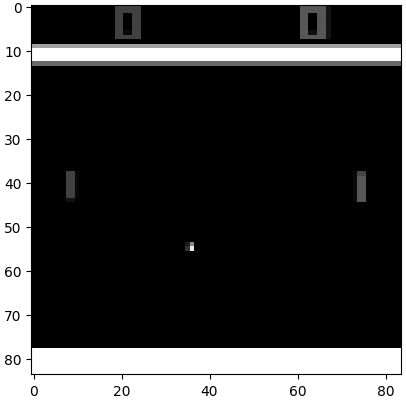</p>

#### The Action Space

As described in the [Pong](https://pettingzoo.farama.org/environments/atari/pong/) page, action is `Discrete(6)`, so:
- Action shape is _(1,)_
- Action values are in range [0,5]

#### Testing the Agent

Your agent will be tested, against other agents, in an environment similar to the following one:

**Notes**:
- It is important to consider that the agent will have to play on **both sides of the board**. That is, he must be able to play on the **right side** (by default in Gymnasium or Gym), but also on the **left side**.
- - You can provide a **single model** to play both sides or alternatively, you can provide **two models**, one model for each side of the board.

In [ ]:
import supersuit as ss
from pettingzoo.atari import pong_v3

# Pre-process using SuperSuit
env = ss.color_reduction_v0(env, mode="B")
env = ss.resize_v1(env, x_size=84, y_size=84)
env = ss.frame_stack_v1(env, 4)
env = ss.dtype_v0(env, dtype=np.float32)
env = ss.normalize_obs_v0(env, env_min=0, env_max=1)

# Load the agents
model1 = <LOAD MODEL 1>
model2 = <LOAD MODEL 2>

rewards = {agent: 0 for agent in env.possible_agents}

# We evaluate here using an AEC environments
env.reset(seed=1234)
env.action_space(env.possible_agents[0]).seed(i)

for agent in env.agent_iter():
    obs, reward, termination, truncation, info = env.last()

    for a in env.agents:
        rewards[a] += env.rewards[a]

    if termination or truncation:
        break
    else:
        if agent == env.possible_agents[0]:
            act = model1.predict(obs)
        else:
            act = model2.predict(obs)
    env.step(act)

env.close()

## Part 2. Playing at Pong

Using the model (or models) trained in the previous exercise, answer the following questions:

<u>Questions</u> (**2 points**):
1. **Test** your model (or models) in 100 episodes of Pong (using the _**PettingZoo** environment_)
- Report the results (win rates, rewards, etc)
2. Export one video (__mp4__ format) of a whole episode

## Part 3. Pong World Tournament

Welcome to the Pong World Tournament!

The rules are the following ones:
- Players will be assigned to a slot randomly (Player 1..8)
- Each match consists of 5 independent games, where players take turns on which side of the board.
- The winner will be the one who wins 3 or more games.
- The winner will move on to the next phase and play against the next opponent.
- Players who reach the **semifinals** will receive **1 point** in this exercise.
- Players who reach the **final** will receive **2 points** in this exercise.
- The **winner** will receive 2 points plus an extra point, i.e. he or she will receive **3 points**.

<p style="text-align:center;">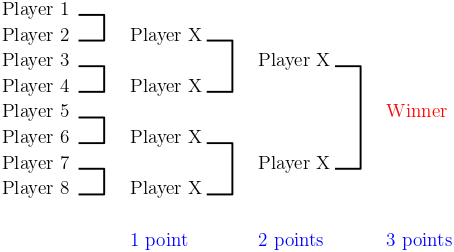</p>